In [ ]:
# Import 3rd party dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

!pip install imblearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
from imblearn.over_sampling import SMOTE
from torch.autograd.functional import hessian
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    confusion_matrix,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import warnings
from IPython.display import display, HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from google.colab import files
import pickle

In [ ]:
# Suppressing Warnings and Adjusting Display Width
# We ignore any warning messages that might arise during execution to maintain clean output.
# Additionally, we adjust the display width to ensure that the content is fully visible within the Jupyter notebook.

warnings.filterwarnings("ignore")
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load the data, exploratory data analysis, and data splitting

In this demo we will use a preprocessed version of Heart Disease dataset.

In [ ]:
# Load the data
!wget -O "heart_random_forest_disease_uci_(preprocessed).csv" "https://drive.google.com/uc?export=download&id=1S3T8jv6Fq8oq3aKLTDOKpVu43KbSuy0E"
dataset_df = pd.read_csv("heart_random_forest_disease_uci_(preprocessed).csv")

--2024-08-27 12:16:56--  https://drive.google.com/uc?export=download&id=1S3T8jv6Fq8oq3aKLTDOKpVu43KbSuy0E
Resolving drive.google.com (drive.google.com)... 64.233.181.102, 64.233.181.113, 64.233.181.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.181.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1S3T8jv6Fq8oq3aKLTDOKpVu43KbSuy0E&export=download [following]
--2024-08-27 12:16:56--  https://drive.usercontent.google.com/download?id=1S3T8jv6Fq8oq3aKLTDOKpVu43KbSuy0E&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.194.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47884 (47K) [application/octet-stream]
Saving to: ‘heart_random_forest_disease_uci_(preprocessed).csv’

heart_random_forest 100%[====

In [ ]:
# Print the data table
dataset_df

,age,sex,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non-anginal,...,fasting_blood_sugar_1,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed_defect,thalassemia_type_normal,thalassemia_type_reversable_defect,target
0,0.604167,1.0,0.320755,0.250000,0.458015,0.354839,1.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,0.770833,0.0,0.528302,0.271552,0.328244,0.419355,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,0.666667,1.0,0.509434,0.221983,0.687023,0.000000,0.333333,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.750000,1.0,0.386792,0.331897,0.427481,0.451613,0.333333,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,0.812500,1.0,0.226415,0.381466,0.610687,0.161290,0.333333,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.479167,1.0,0.320755,0.226293,0.862595,0.000000,0.000000,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
295,0.250000,1.0,0.386792,0.221983,0.465649,0.000000,0.000000,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
296,0.666667,1.0,0.415094,0.142241,0.412214,0.580645,0.333333,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
297,0.375000,1.0,0.169811,0.224138,0.549618,0.016129,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   age                                 299 non-null    float64
 1   sex                                 299 non-null    float64
 2   resting_blood_pressure              299 non-null    float64
 3   cholesterol                         299 non-null    float64
 4   max_heart_rate_achieved             299 non-null    float64
 5   st_depression                       299 non-null    float64
 6   num_major_vessels                   299 non-null    float64
 7   chest_pain_type_asymptomatic        299 non-null    float64
 8   chest_pain_type_atypical_angina     299 non-null    float64
 9   chest_pain_type_non-anginal         299 non-null    float64
 10  chest_pain_type_typical_angina      299 non-null    float64
 11  fasting_blood_sugar_0               299 non-n

In [ ]:
dataset_df.describe()

,age,sex,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non-anginal,...,fasting_blood_sugar_1,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed_defect,thalassemia_type_normal,thalassemia_type_reversable_defect,target
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.531703,0.67893,0.355809,0.316349,0.597922,0.170730,0.224080,0.481605,0.163880,0.277592,...,0.143813,0.668896,0.331104,0.070234,0.464883,0.464883,0.060201,0.548495,0.391304,0.464883
std,0.188130,0.46767,0.167432,0.113217,0.176497,0.187543,0.312479,0.500499,0.370787,0.448562,...,0.351488,0.471399,0.471399,0.255970,0.499601,0.499601,0.238257,0.498477,0.488860,0.499601
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.395833,0.00000,0.245283,0.239224,0.469466,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.562500,1.00000,0.339623,0.306034,0.618321,0.129032,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.666667,1.00000,0.433962,0.378233,0.721374,0.258065,0.333333,1.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
predictor_columns = [col for col in dataset_df.columns if col != "target"]

# Count the number of predictor columns
num_predictor_columns = len(predictor_columns)

In [ ]:
# Normalize each predictor attribute using z-score
for predictor in predictor_columns:
    dataset_df[predictor] = (dataset_df[predictor] - dataset_df[predictor].mean()) / dataset_df[predictor].std()

In [ ]:
# Generate descriptive statistics for the dataset

dataset_df.describe()

,age,sex,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non-anginal,...,fasting_blood_sugar_1,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed_defect,thalassemia_type_normal,thalassemia_type_reversable_defect,target
count,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,...,2.990000e+02,2.990000e+02,2.990000e+02,299.000000,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,299.000000
mean,1.188199e-16,0.000000,-2.970496e-16,-6.832142e-17,-1.782298e-16,5.940993e-18,-5.940993e-18,-2.673447e-17,0.000000,3.267546e-17,...,5.940993e-17,1.782298e-17,-1.782298e-17,0.000000,-1.039674e-16,-1.113936e-16,-6.386567e-17,8.911489e-17,5.346893e-17,0.464883
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499601
min,-2.826245e+00,-1.451727,-2.125098e+00,-2.794189e+00,-3.387723e+00,-9.103511e-01,-7.171040e-01,-9.622500e-01,-0.441978,-6.188490e-01,...,-4.091540e-01,-1.418959e+00,-7.023849e-01,-0.274385,-9.305076e-01,-9.305076e-01,-2.526711e-01,-1.100342e+00,-8.004418e-01,0.000000
25%,-7.222091e-01,-1.451727,-6.601241e-01,-6.812144e-01,-7.278108e-01,-9.103511e-01,-7.171040e-01,-9.622500e-01,-0.441978,-6.188490e-01,...,-4.091540e-01,-1.418959e+00,-7.023849e-01,-0.274385,-9.305076e-01,-9.305076e-01,-2.526711e-01,-1.100342e+00,-8.004418e-01,0.000000
50%,1.637007e-01,0.686531,-9.667248e-02,-9.110447e-02,1.155760e-01,-2.223385e-01,-7.171040e-01,-9.622500e-01,-0.441978,-6.188490e-01,...,-4.091540e-01,7.023849e-01,-7.023849e-01,-0.274385,-9.305076e-01,-9.305076e-01,-2.526711e-01,9.057691e-01,-8.004418e-01,0.000000
75%,7.173944e-01,0.686531,4.667792e-01,5.465950e-01,6.994593e-01,4.656741e-01,3.496328e-01,1.035755e+00,-0.441978,1.610499e+00,...,-4.091540e-01,7.023849e-01,1.418959e+00,-0.274385,1.071088e+00,1.071088e+00,-2.526711e-01,9.057691e-01,1.245132e+00,1.000000
max,2.489214e+00,0.686531,3.847489e+00,6.038425e+00,2.278107e+00,4.421746e+00,2.483107e+00,1.035755e+00,2.254989,1.610499e+00,...,2.435893e+00,7.023849e-01,1.418959e+00,3.632330,1.071088e+00,1.071088e+00,3.944477e+00,9.057691e-01,1.245132e+00,1.000000


In [ ]:
# Split dataset into training and test sets
train_df, test_df = train_test_split(dataset_df, test_size=0.1, random_state=42)

# Separate target variable from features
y_train = train_df["target"]
X_train = train_df.drop("target", axis=1)
y_test = test_df["target"]
X_test = test_df.drop("target", axis=1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Store the mean, standard deviation, and normalized PDF using KDE for each predictor attribute and class
predictor_info = {}
column_index_map = {}
for i, col_name in enumerate(predictor_columns):
    column_index_map[i] = col_name
    pdf_all = gaussian_kde(X_train[col_name])
    pdf0 = gaussian_kde(X_train[dataset_df['target'] == 0][col_name])
    pdf1 = gaussian_kde(X_train[dataset_df['target'] == 1][col_name])
    predictor_info[i] = {
        'mean': X_train[col_name].mean(),
        'std': X_train[col_name].std(),
        'pdf': pdf_all,
        'pdf0': pdf0,
        'pdf1': pdf1
    }



In [ ]:
from scipy.stats import norm, entropy, gaussian_kde

def JSD(p, q):
    m = 0.5 * (p + q)
    return 0.5 * entropy(p, m) + 0.5 * entropy(q, m)

In [ ]:
# Define the x values where you want to evaluate the PDF
x = np.linspace(-3, 3, 100)

# Calculate the uniform PDF along x
uniform_prior_x = 1/6*np.ones(100)

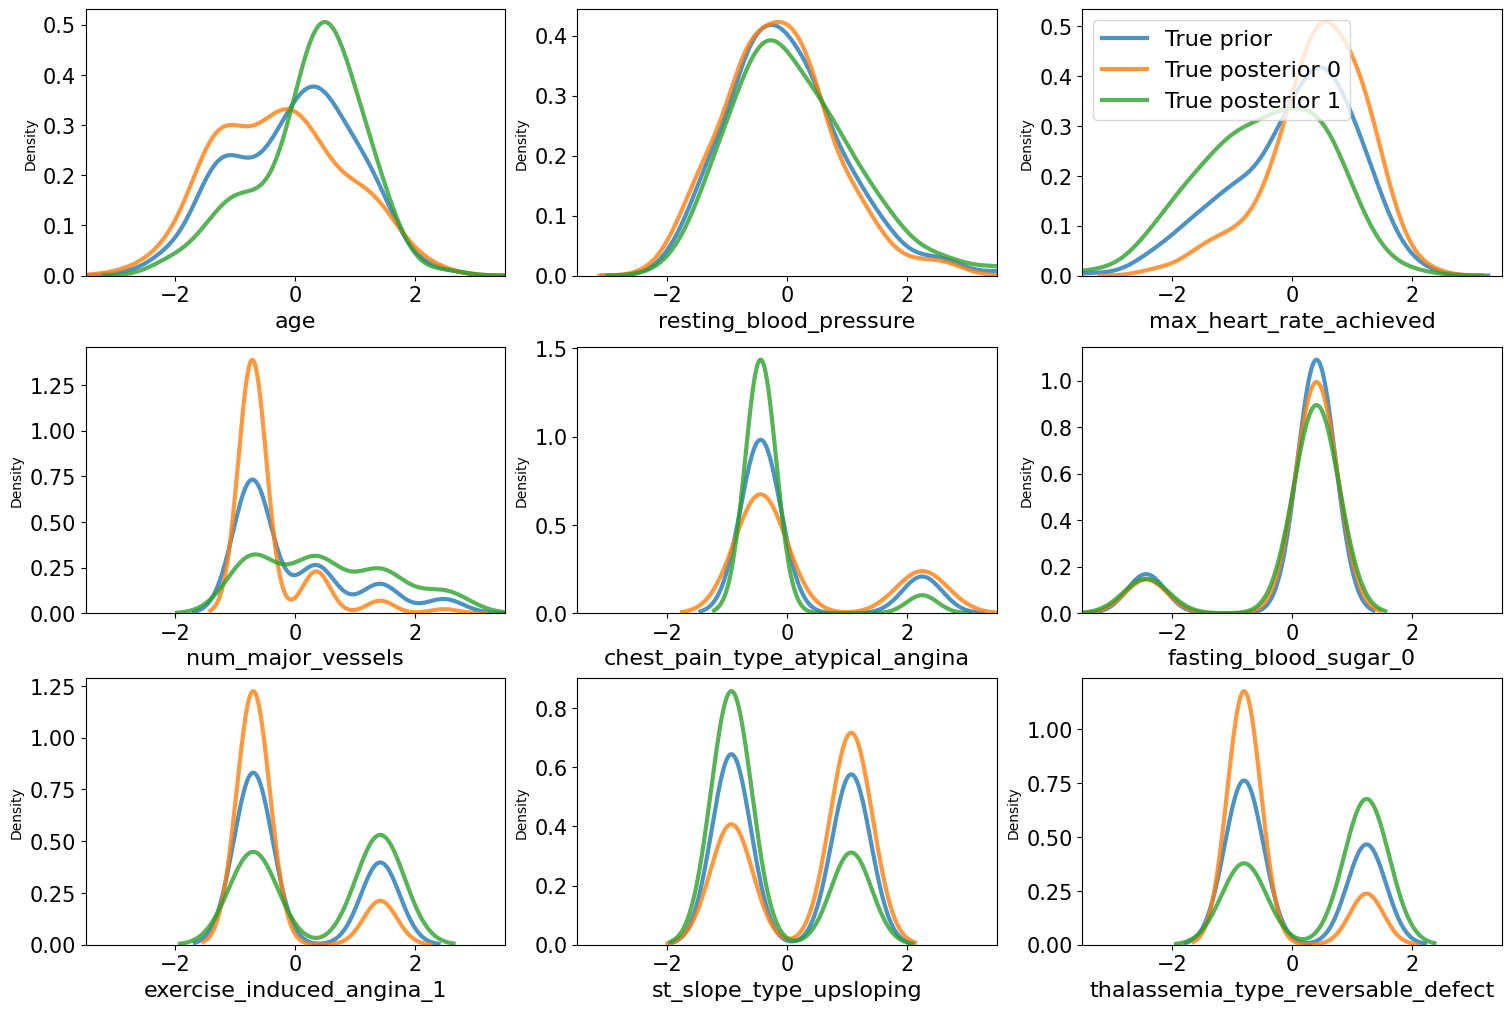

In [ ]:
# Set up the plot layout
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Define the indices of the attributes to be plotted
attribute_indices = [0, 2, 4, 6, 8, 11, 14, 17, 20]
selected_predictor_columns = [predictor_columns[idx] for idx in attribute_indices]

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[dataset_df['target'] == 0], x=col_name, ax=axes[row, col], label='True posterior 0', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[dataset_df['target'] == 1], x=col_name, ax=axes[row, col], label='True posterior 1', linewidth=3, alpha=0.8)

    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Add vertical lines at the mean of each attribute
    #axes[row, col].axvline(predictor_info[i]['mean'], linestyle='--', color='black', label='Mean')
    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

#plt.suptitle('KDE Plots of Predictor Attributes (Normalized)', fontsize=20)
plt.show()

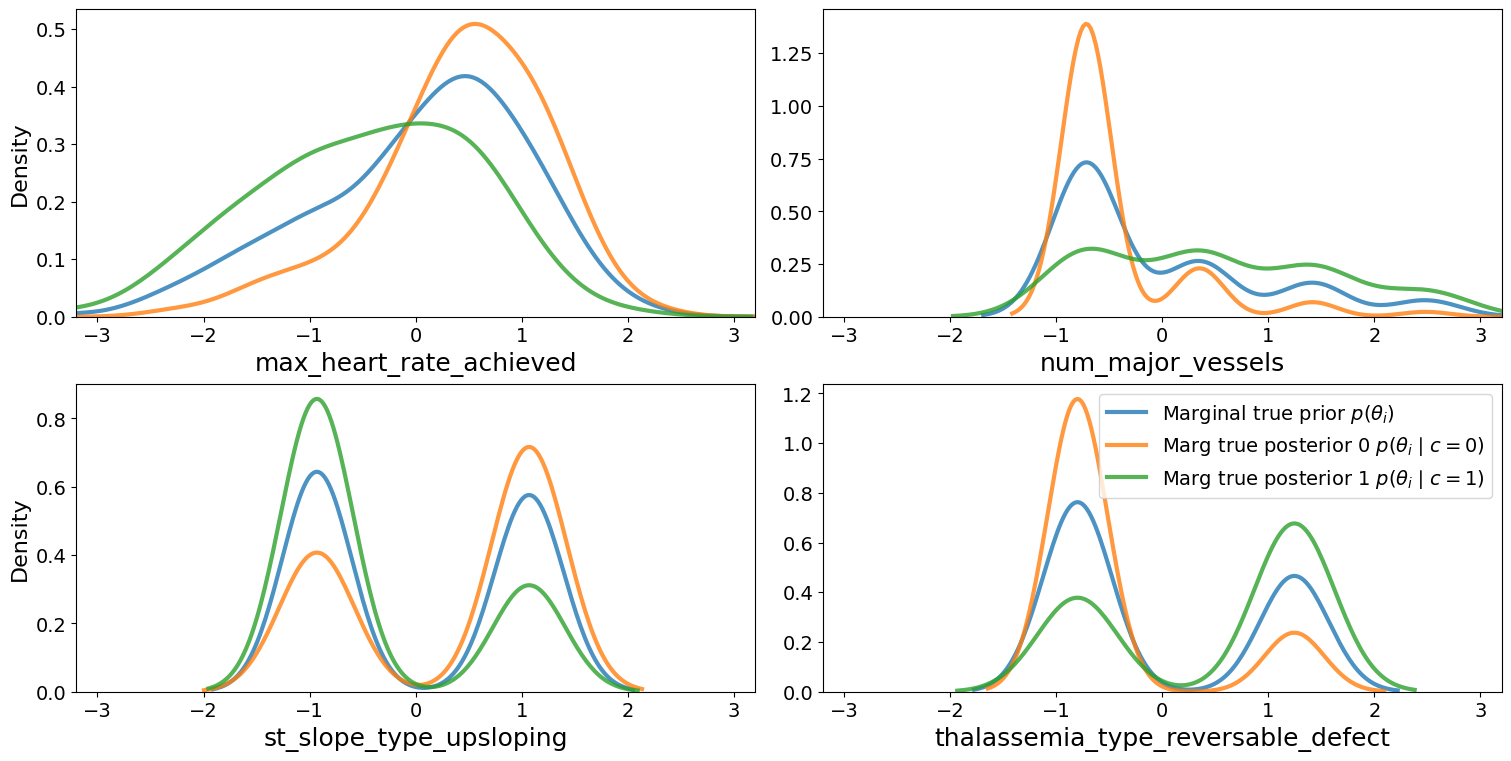

In [ ]:
# Set up the plot layout
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 7.5), constrained_layout=True)

# Define the indices of the attributes to be plotted
paper_attribute_indices = [4, 6, 17, 20]
paper_selected_predictor_columns = [predictor_columns[idx] for idx in paper_attribute_indices]

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(paper_selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='Marginal true prior $p(\\theta_i)$', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[dataset_df['target'] == 0], x=col_name, ax=axes[row, col], label='Marg true posterior 0 $p(\\theta_i \\mid c=0)$', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[dataset_df['target'] == 1], x=col_name, ax=axes[row, col], label='Marg true posterior 1 $p(\\theta_i \\mid c=1)$', linewidth=3, alpha=0.8)

    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=14)
    axes[row, col].set_xlabel(col_name, fontsize=18)

    if col==1:
        axes[row, col].set(ylabel='')
    else:
        axes[row, col].set_ylabel('Density', fontsize=16)

    # Add vertical lines at the mean of each attribute
    axes[row, col].set_xlim(-3.2, 3.2)
    if i==3:
        axes[row, col].legend(fontsize=14)

#plt.suptitle('KDE Plots of Predictor Attributes (Normalized)', fontsize=20)
plt.show()

In [ ]:
# Set up the plot layout

prior_KLDs = []

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):


    # Plot uniform prior distribution
    true_prior_x = predictor_info[i]['pdf'](x)

    KLD_value = entropy(true_prior_x, uniform_prior_x)
    prior_KLDs.append(KLD_value)

prior_KLDs = np.array(prior_KLDs)

In [ ]:
# Get the indices that would sort the KLD values in descending order
prior_KLDs_sorted_indices = np.argsort(prior_KLDs)

# Display the indices order associated with descending order of KLD values
print("Indices order associated with descending order of KLD values:")
print(prior_KLDs_sorted_indices)

Indices order associated with descending order of KLD values:
[ 0  4  2  3  5  6 17  7 16 19 20  1 13 14  9  8 11 12 10 15 18]


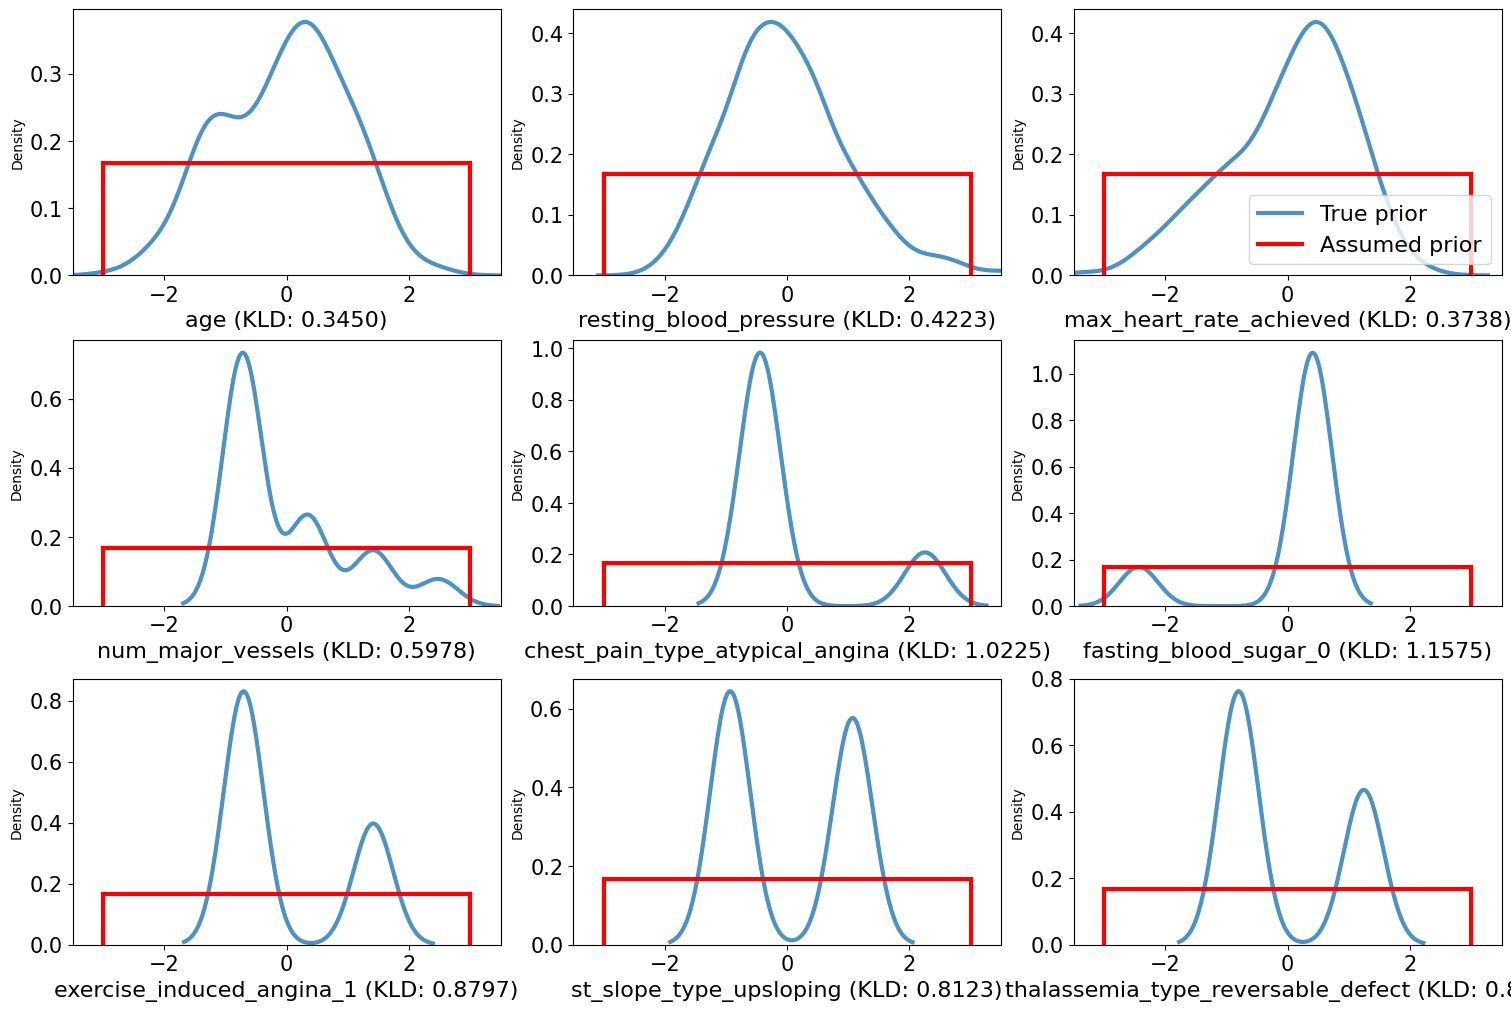

In [ ]:
# Set up the plot layout
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)

    # Plot uniform prior distribution
    uniform_height = 1 / 6
    uniform_x = np.linspace(-3,3,100)
    uniform_y = np.full_like(uniform_x, uniform_height)
    axes[row, col].plot(uniform_x, uniform_y, label='Assumed prior', color='red', linewidth=3)

    max_uniform_y = uniform_height / axes[row, col].get_ylim()[1]

    # Add vertical lines on the left and right ends of the uniform distribution
    axes[row, col].axvline(x=-3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)
    axes[row, col].axvline(x=3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)


    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Display JSD value and attribute name as the title
    axes[row, col].set_xlabel(f'{col_name} (KLD: {prior_KLDs[attribute_indices[i]]:.4f})', fontsize=16)
    #axes[row, col].set_xlabel(col_name, fontsize=16)


    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

plt.show()

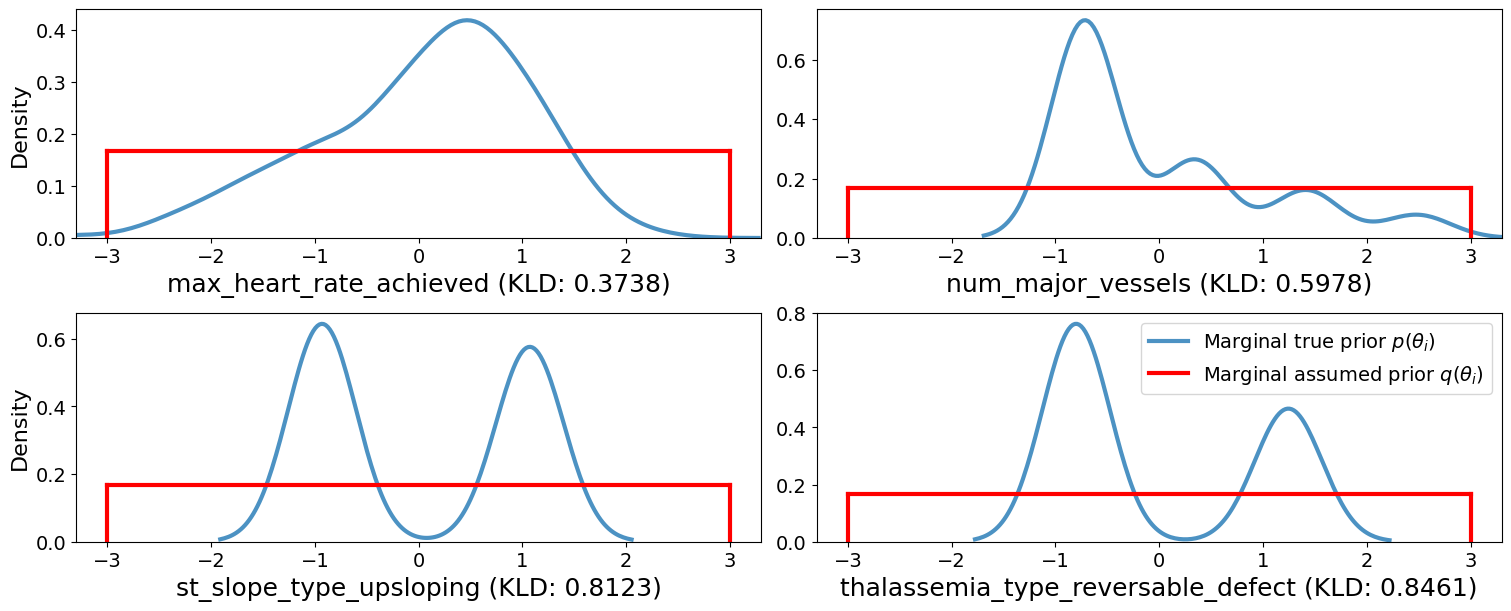

In [ ]:
# Set up the plot layout
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 6), constrained_layout=True)

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(paper_selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='Marginal true prior $p(\\theta_i)$', linewidth=3, alpha=0.8)

    # Plot uniform prior distribution
    uniform_height = 1 / 6
    uniform_x = np.linspace(-3,3,100)
    uniform_y = np.full_like(uniform_x, uniform_height)
    axes[row, col].plot(uniform_x, uniform_y, label='Marginal assumed prior $q(\\theta_i)$', color='red', linewidth=3)

    max_uniform_y = uniform_height / axes[row, col].get_ylim()[1]

    # Add vertical lines on the left and right ends of the uniform distribution
    axes[row, col].axvline(x=-3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)
    axes[row, col].axvline(x=3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)


    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=14)


    # Display JSD value and attribute name as the title
    axes[row, col].set_xlabel(f'{col_name} (KLD: {prior_KLDs[paper_attribute_indices[i]]:.4f})', fontsize=18)

    if col==1:
        axes[row, col].set(ylabel='')
    else:
        axes[row, col].set_ylabel('Density', fontsize=16)

    axes[row, col].set_xlim(-3.3, 3.3)
    if i==3:
        axes[row, col].legend(fontsize=14)

plt.show()

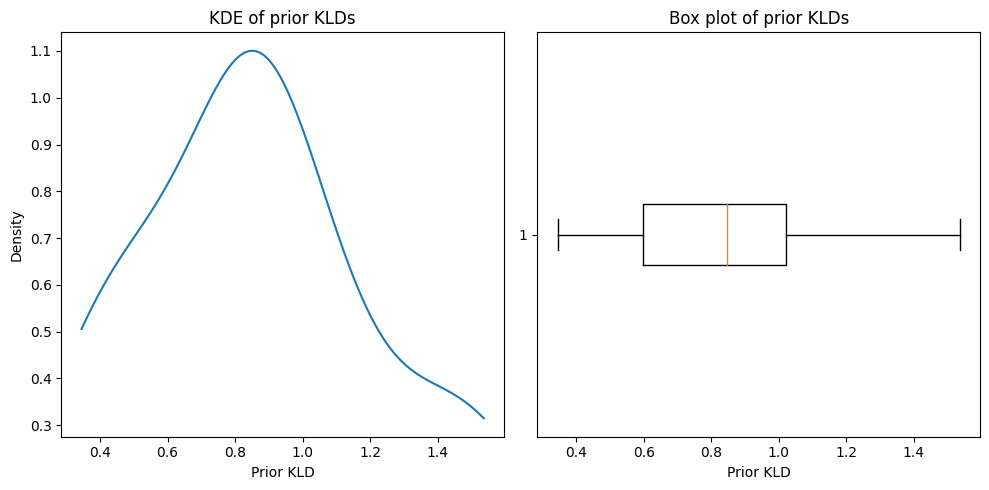

In [ ]:
# Create a figure with subplots for KDE and box plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot KDE of prior KLDs
kde = gaussian_kde(prior_KLDs)
y = np.linspace(min(prior_KLDs), max(prior_KLDs), 100)
ax1.plot(y, kde(y))
ax1.set_xlabel('Prior KLD')
ax1.set_ylabel('Density')
ax1.set_title('KDE of prior KLDs')

# Plot box plot of prior KLDs
ax2.boxplot(prior_KLDs, vert=False)
ax2.set_xlabel('Prior KLD')
ax2.set_title('Box plot of prior KLDs')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy, gaussian_kde


def proposal_within_range(current_params, scale):
    proposed_params = current_params + np.random.normal(0, scale, len(current_params))

    while not np.all(np.logical_and(-3 <= proposed_params, proposed_params <= 3)):
        idx_outside_range = np.where(np.logical_or(proposed_params < -3, proposed_params > 3))[0]
        proposed_params[idx_outside_range] = current_params[idx_outside_range] + np.random.normal(0, scale, len(idx_outside_range))

    return proposed_params



# Log Prior distribution
def log_uniform_prior(params):
    log_joint_probability = 0

    for i, param in enumerate(params):
        log_joint_probability += np.log(1/6)

    return log_joint_probability



# Likelihood function
def log_likelihood(params, data):
    feature_values = {col_name: [value] for col_name, value in zip(column_index_map.values(), params)}
    X_new = pd.DataFrame(feature_values)

    if data == 1:
        return np.log(ml.predict_proba(X_new)[0, 1])
    else:
        return np.log(1 - ml.predict_proba(X_new)[0, 1])



# Metropolis-Hastings MCMC algorithm
def metropolis_hastings(num_samples, initial_params, data):
    np.random.seed(42)

    current_params = initial_params
    accepted_params = [[] for _ in range(len(initial_params))]

    current_log_posterior = log_uniform_prior(current_params) + log_likelihood(current_params, data)

    iter = 0
    num_accepted = 0

    while num_accepted < num_samples:
        # Generate proposed params until likelihood >= 0.8
        proposed_params = np.zeros_like(current_params)
        proposed_likelihood = -np.inf

        iter = iter + 1

        num_proposing = 0
        while proposed_likelihood < np.log(0.5):
            num_proposing = num_proposing + 1
            proposed_params = proposal_within_range(current_params, 1)
            proposed_likelihood = log_likelihood(proposed_params, data)

        # Calculate acceptance probability
        proposed_log_posterior = log_uniform_prior(proposed_params) + proposed_likelihood
        acceptance_probability = np.exp(proposed_log_posterior - current_log_posterior)


        # Accept or reject the proposed parameter
        if np.random.rand() < acceptance_probability:
            num_accepted = num_accepted + 1

            if num_accepted % 1000 == 0:
                print("Num samples accepted: ", num_accepted)

            current_params = proposed_params
            current_log_posterior = proposed_log_posterior
            for i, param in enumerate(current_params):
                accepted_params[i].append(param)

    return accepted_params

In [ ]:
# Configuration settings for running MCMC and saving samples

run_MCMC = True
save_samples = True

data_shifts = [0, -0.2, -0.4, -0.6, -0.8, -1, 0.2, 0.4, 0.6, 0.8, 1]

samples_0_file_name = 'heart_DNN_class_0_samples.pickle'
samples_1_file_name = 'heart_DNN_class_1_samples.pickle'

In [ ]:
class0_samples = []
class1_samples = []

original_training_accuracies = []
original_test_accuracies = []

for shift in data_shifts:

    print('\n\n\nInverse estimation for data with shift ', shift)

    # Shift every value in the DataFrame to the right
    X_train_shifted = X_train.add(shift)


    # Resample the training set using RandomOverSampler to address class imbalance
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_shifted, y_train)



    print('\nModel evaluation on training set:')

    # Initialize Random Forest classifier

    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_train, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    original_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)



    print('\nModel evaluation on test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    original_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    if run_MCMC:

        # Run MCMC
        num_samples = 5000
        initial_params = np.zeros(num_predictor_columns)

        print('\nMCMC for class 0')
        accepted_params_zero = metropolis_hastings(num_samples, initial_params, 0)
        class0_samples.append(accepted_params_zero)

        print('\nMCMC for class 1')
        accepted_params_one = metropolis_hastings(num_samples, initial_params, 1)
        class1_samples.append(accepted_params_one)

if save_samples:

    # Save the list to a file
    with open(samples_0_file_name, 'wb') as f:
        pickle.dump(class0_samples, f)

    files.download(samples_0_file_name)

    # Save the list to a file
    with open(samples_1_file_name, 'wb') as f:
        pickle.dump(class1_samples, f)

    files.download(samples_1_file_name)

if ~ run_MCMC:
    # Load the list from the file
    with open(samples_0_file_name, 'rb') as f:
        class0_samples = pickle.load(f)

    with open(samples_1_file_name, 'rb') as f:
        class1_samples = pickle.load(f)

original_training_accuracies = np.array(original_training_accuracies)
original_test_accuracies = np.array(original_test_accuracies)





Inverse estimation for data with shift  0

Model evaluation on training set:
Confusion Matrix:
[[149   0]
 [  0 120]]
Precision: 1.0
Recall: 1.0
AUC ROC: 1.0
Cohen Kappa Score: 1.0
Accuracy: 1.0
Geometric Mean Score: 1.0

Model evaluation on test set:
Confusion Matrix:
[[ 8  3]
 [ 3 16]]
Precision: 0.8421052631578947
Recall: 0.8421052631578947
AUC ROC: 0.8708133971291866
Cohen Kappa Score: 0.569377990430622
Accuracy: 0.8
Geometric Mean Score: 0.7825855808712295

MCMC for class 0
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000

MCMC for class 1
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000



Inverse estimation for data with shift  -0.2

Model evaluation on training set:
Confusion Matrix:
[[140   9]
 [  0 120]]
Precision: 0.9302325581395349
Recall: 1.0
AUC ROC: 1.0
Cohen Kappa Score: 0.932789206296327

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
accepted_params_zero = class0_samples[0]
accepted_params_one = class1_samples[0]

In [ ]:
# Define the est_posterior function with list comprehension
def est_posterior(a, prob, bins):
    return np.array([prob[np.digitize(val, bins) - 1] if (val > np.min(bins)) and (val < np.max(bins) and (prob[np.digitize(val, bins) - 1] != 0)) else 1e-9 for val in a])

In [ ]:
avg_posterior_KLDs = []


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    prob, bins = np.histogram(accepted_params_one[i], bins=100, density=True)
    est_post1 = est_posterior(x, prob, bins)


     # Posterior histogram
    prob, bins = np.histogram(accepted_params_zero[i], bins=100, density=True)
    est_post0 = est_posterior(x, prob, bins)


     # Prior distribution
    true_posterior1_x = predictor_info[i]['pdf1'](x)

    # Prior distribution
    true_posterior0_x = predictor_info[i]['pdf0'](x)

    avg_KLD_value = 0.5*entropy(true_posterior0_x, est_post0) + 0.5*entropy(true_posterior1_x, est_post1)
    avg_posterior_KLDs.append(avg_KLD_value)


avg_posterior_KLDs = np.array(avg_posterior_KLDs)

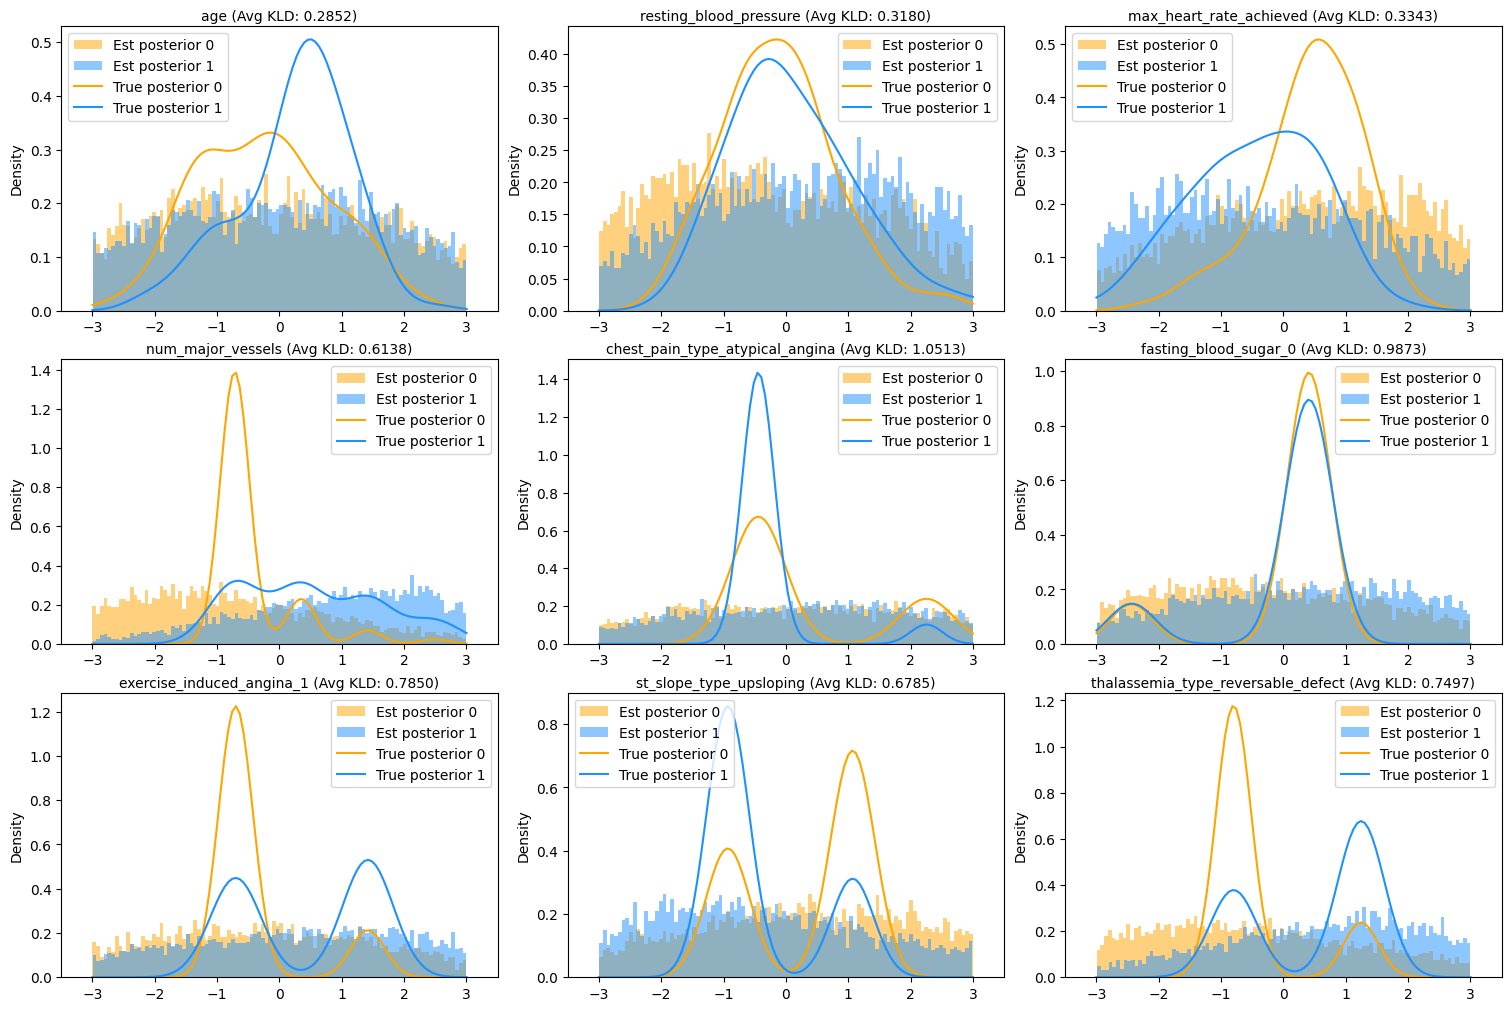

In [ ]:
# Set up the plot layout
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    post0, bins0, _ = axes[row, col].hist(accepted_params_zero[attribute_indices[i]], bins=100, density=True, alpha=0.5, label='Est posterior 0', color='orange')
    post1, bins1, _ = axes[row, col].hist(accepted_params_one[attribute_indices[i]], bins=100, density=True, alpha=0.5, label='Est posterior 1', color='dodgerblue')

    # Prior distribution
    posterior0_x = predictor_info[attribute_indices[i]]['pdf0'](x)
    axes[row, col].plot(x, posterior0_x, label='True posterior 0', color='orange')

     # Prior distribution
    posterior1_x = predictor_info[attribute_indices[i]]['pdf1'](x)
    axes[row, col].plot(x, posterior1_x, label='True posterior 1', color='dodgerblue')

    axes[row, col].xaxis.set_label_position('top')
    axes[row, col].set_xlim(-3.5, 3.5)
    axes[row, col].set_xlabel(f'{col_name} (Avg KLD: {avg_posterior_KLDs[attribute_indices[i]]:.4f})')
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()

plt.show()

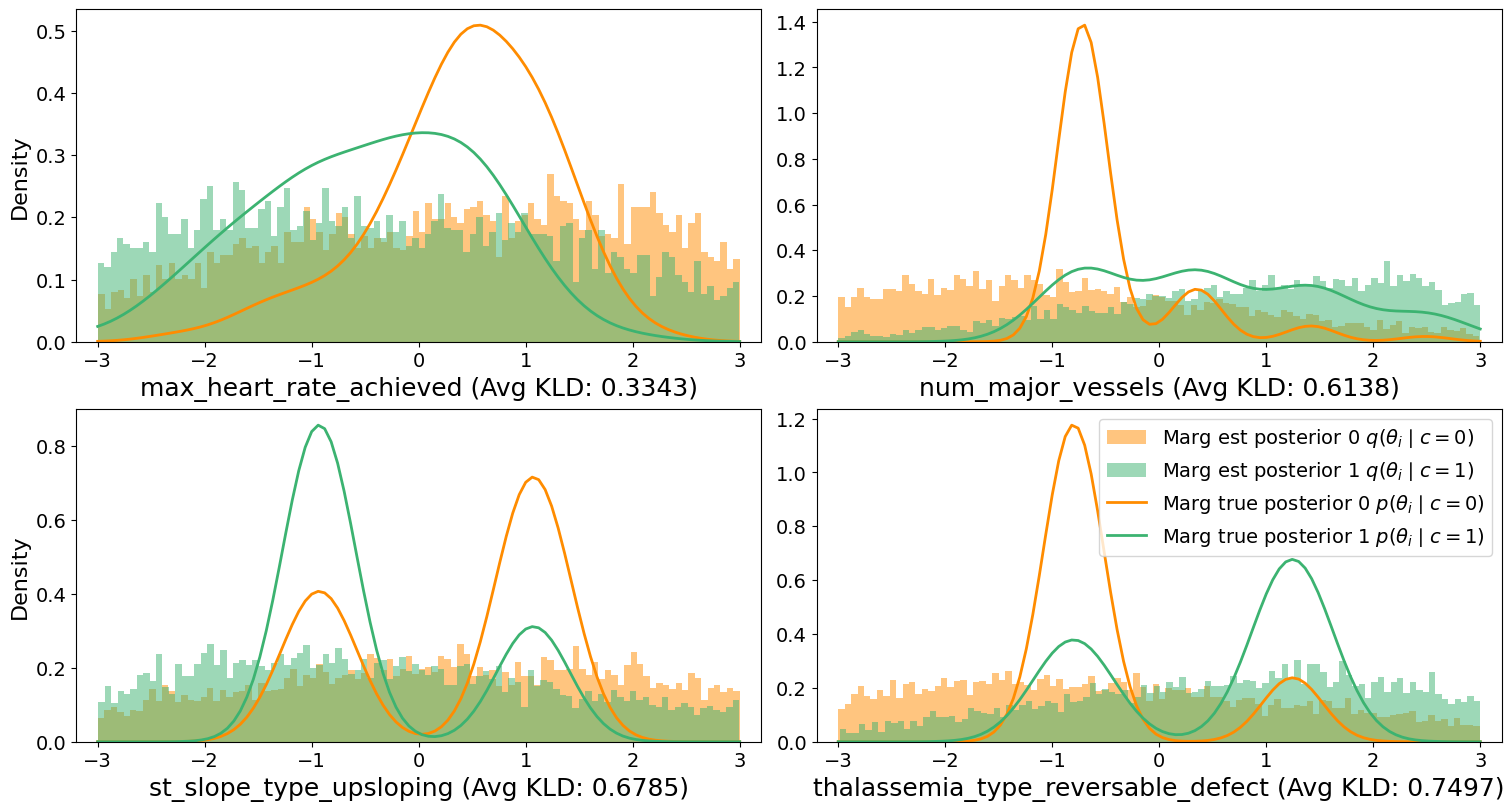

In [ ]:
# Set up the plot layout
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 8), constrained_layout=True)


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(paper_selected_predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    post0, bins0, _ = axes[row, col].hist(accepted_params_zero[paper_attribute_indices[i]], bins=100, density=True, alpha=0.5, label='Marg est posterior 0 $q(\\theta_i \\mid c=0)$', color='darkorange')
    post1, bins1, _ = axes[row, col].hist(accepted_params_one[paper_attribute_indices[i]], bins=100, density=True, alpha=0.5, label='Marg est posterior 1 $q(\\theta_i \\mid c=1)$', color='mediumseagreen')

    # Prior distribution
    posterior0_x = predictor_info[paper_attribute_indices[i]]['pdf0'](x)
    axes[row, col].plot(x, posterior0_x, label='Marg true posterior 0 $p(\\theta_i \\mid c=0)$', color='darkorange', linewidth=2)

     # Prior distribution
    posterior1_x = predictor_info[paper_attribute_indices[i]]['pdf1'](x)
    axes[row, col].plot(x, posterior1_x, label='Marg true posterior 1 $p(\\theta_i \\mid c=1)$', color='mediumseagreen', linewidth=2)

    axes[row, col].set_xlabel(f'{col_name} (Avg KLD: {avg_posterior_KLDs[paper_attribute_indices[i]]:.4f})', fontsize=18)

    axes[row, col].tick_params(axis='both', labelsize=14)

    axes[row, col].xaxis.set_label_position('bottom')
    axes[row, col].set_xlim(-3.2, 3.2)


    if col==1:
        axes[row, col].set(ylabel='')
    else:
        axes[row, col].set_ylabel('Density', fontsize=16)

    if i==3:
        axes[row, col].legend(fontsize=14)

plt.show()

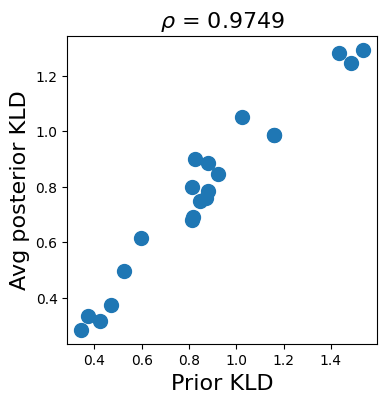

In [ ]:
avg_post_KLDs_all_params = []

for i, shift in enumerate(data_shifts):

    #print('\n\n\nPrior JSD vs  Avg posterior KLD for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)


    avg_posterior_KLDs = []


    # Plot the KDEs for each attribute and class
    for j, col_name in enumerate(predictor_columns):
        row = j // ncols
        col = j % ncols

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_one[j], bins=100, density=True)
        est_post1 = est_posterior(x, prob, bins)


        # Posterior histogram
        prob, bins = np.histogram(accepted_params_zero[j], bins=100, density=True)
        est_post0 = est_posterior(x, prob, bins)


        # Prior distribution
        true_posterior1_x = predictor_info[j]['pdf1'](x)

        # Prior distribution
        true_posterior0_x = predictor_info[j]['pdf0'](x)

        avg_KLD_value = 0.5*entropy(true_posterior0_x, est_post0) + 0.5*entropy(true_posterior1_x, est_post1)
        avg_posterior_KLDs.append(avg_KLD_value)


    avg_posterior_KLDs = np.array(avg_posterior_KLDs)
    avg_post_KLDs_all_params.append(np.mean(avg_posterior_KLDs))


    if shift==0:
        plt.figure(figsize=(4, 4))

        # Create a scatter plot of the two sets of importance values
        plt.scatter(prior_KLDs, avg_posterior_KLDs, s=100)


        # Calculate the correlation coefficient between the two sets of importance values
        correlation_coefficient = np.corrcoef(prior_KLDs, avg_posterior_KLDs)[0, 1]

        # Set the axis labels and title
        plt.xlabel('Prior KLD', fontsize=16)
        plt.ylabel('Avg posterior KLD', fontsize=16)
        plt.title('$\\rho$ = {:.4f}'.format(correlation_coefficient), fontsize=16)

        # Display the plot
        plt.show()

avg_post_KLDs_all_params = np.array(avg_post_KLDs_all_params)


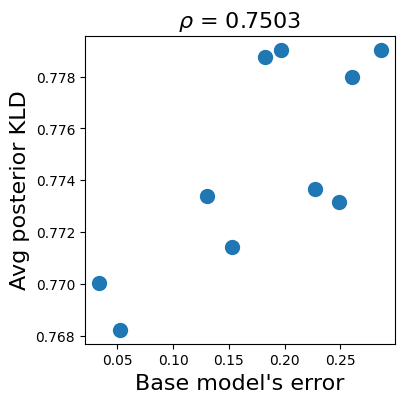

In [ ]:
plt.figure(figsize=(4, 4))

# Create a scatter plot of the two sets of importance values
plt.scatter(1-original_training_accuracies[1:], avg_post_KLDs_all_params[1:], s=100)


# Calculate the correlation coefficient between the two sets of importance values
training_correlation_coefficient = np.corrcoef(1-original_training_accuracies[1:], avg_post_KLDs_all_params[1:])[0, 1]

# Set the axis labels and title
plt.xlabel('Base model\'s error', fontsize=16)
plt.ylabel('Avg posterior KLD', fontsize=16)
plt.title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Display the plot
plt.show()

In [ ]:
synthetic_training_accuracies = []
synthetic_test_accuracies = []

for i, shift in enumerate(data_shifts):

    print('\n\n\nSynthetic models for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)

    # Concatenate accepted_params_one and accepted_params_zero along the rows axis
    simulated_dataset = np.concatenate((accepted_params_one, accepted_params_zero), axis=1)

    # Transpose the dataset to have 2000 records and 15 predictor attributes
    simulated_dataset = simulated_dataset.T

    # Create an array of class labels (1 for class 1 and 0 for class 0)
    class_labels = np.concatenate((np.ones(accepted_params_one.shape[1]), np.zeros(accepted_params_zero.shape[1])))

    # Add the class labels as the 16th attribute
    simulated_dataset = np.column_stack((simulated_dataset, class_labels))

    data_columns = [col for col in dataset_df.columns]

    # Convert binary_dataset to a DataFrame
    simulated_dataset_df = pd.DataFrame(simulated_dataset)

    # Rename the columns of simulated_dataset_df to match dataset_df
    simulated_dataset_df.columns = dataset_df.columns

    # Check the first few rows of simulated_dataset_df
    simulated_dataset_df

    # Separate target variable from features
    sim_train_y = simulated_dataset_df["target"]
    sim_train_X = simulated_dataset_df.drop("target", axis=1)

    print('\nSynthetic model evaluation on original training set:')

    # Initialize Random Forest classifier
    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(sim_train_X, sim_train_y)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_train, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    synthetic_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    print('\nSynthetic model evaluation on original test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    synthetic_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


synthetic_training_accuracies = np.array(synthetic_training_accuracies)
synthetic_test_accuracies = np.array(synthetic_test_accuracies)




Synthetic models for data with shift  0

Synthetic model evaluation on original training set:
Confusion Matrix:
[[143   6]
 [  7 113]]
Precision: 0.9495798319327731
Recall: 0.9416666666666667
AUC ROC: 0.9857941834451901
Cohen Kappa Score: 0.902129803252078
Accuracy: 0.9516728624535316
Geometric Mean Score: 0.950656196308328

Synthetic model evaluation on original test set:
Confusion Matrix:
[[ 9  2]
 [ 2 17]]
Precision: 0.8947368421052632
Recall: 0.8947368421052632
AUC ROC: 0.8899521531100479
Cohen Kappa Score: 0.7129186602870814
Accuracy: 0.8666666666666667
Geometric Mean Score: 0.8556035391861949



Synthetic models for data with shift  -0.2

Synthetic model evaluation on original training set:
Confusion Matrix:
[[123  26]
 [  3 117]]
Precision: 0.8181818181818182
Recall: 0.975
AUC ROC: 0.9772930648769576
Cohen Kappa Score: 0.7858456639306008
Accuracy: 0.8921933085501859
Geometric Mean Score: 0.8971431166832193

Synthetic model evaluation on original test set:
Confusion Matrix:
[[

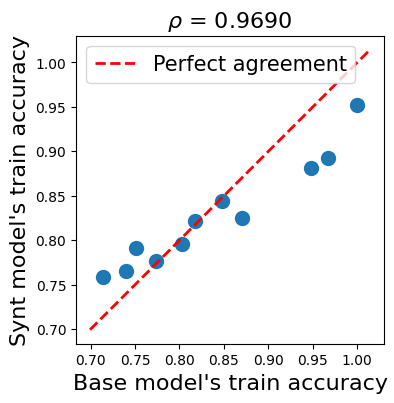

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the training accuracy values
ax.scatter(original_training_accuracies[:], synthetic_training_accuracies[:], s=100)

# Calculate the correlation coefficient between the training accuracy values
training_correlation_coefficient = np.corrcoef(original_training_accuracies[:], synthetic_training_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's train accuracy", fontsize=16)
ax.set_ylabel("Synt model's train accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red', label='Perfect agreement')


# Add a legend to the plot
ax.legend(fontsize=15)

# Display the plot
plt.show()

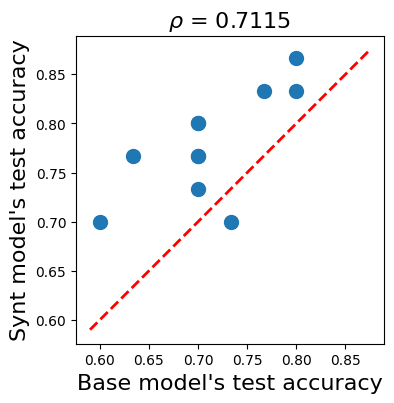

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the test accuracy values
ax.scatter(original_test_accuracies[:], synthetic_test_accuracies[:], s=100)

# Calculate the correlation coefficient between the test accuracy values
test_correlation_coefficient = np.corrcoef(original_test_accuracies[:], synthetic_test_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's test accuracy", fontsize=16)
ax.set_ylabel("Synt model's test accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(test_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red')


# Display the plot
plt.show()